In [1]:
import pandas as pd

In [2]:
constructors = pd.read_csv(r'data\constructors.csv')
circuit = pd.read_csv(r'data\circuits.csv')
drivers = pd.read_csv(r'data\drivers.csv')
races = pd.read_csv(r'data\races.csv')
results = pd.read_csv(r'data\results.csv')
quali = pd.read_csv(r'data\qualifying.csv')

In [3]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [4]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
quali.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [6]:
df1 = pd.merge(races,results,how='inner',on=['raceId'])

In [7]:
df2 = pd.merge(df1,quali,how='inner',on=['raceId','driverId','constructorId'])

In [8]:
df3 = pd.merge(df2,drivers,how='inner',on=['driverId'])

In [9]:
df4 = pd.merge(df3,constructors,how='inner',on=['constructorId'])

In [10]:
df4.head()

,raceId,year,round,circuitId,name_x,date,time_x,url_x,fp1_date,fp1_time,...,code,forename,surname,dob,nationality_x,url_y,constructorRef,name_y,nationality_y,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,brawn,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,BAR,Rubens,Barrichello,1972-05-23,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello,brawn,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP
2,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,TRU,Jarno,Trulli,1974-07-13,Italian,http://en.wikipedia.org/wiki/Jarno_Trulli,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing
3,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing
4,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...


We'll be getting the merge error because both df4 and circuit have a column named 'url', and pandas tries to rename them as 'url_x' and 'url_y'. If either DataFrame already has a column with that name, it causes a conflict and throws an error.

So we better drop the column.

In [11]:
df4 = df4.drop('url_x', axis=1)

In [12]:
df5 = pd.merge(df4,circuit,how='inner',on=['circuitId'])

In [13]:
df5.head()

,raceId,year,round,circuitId,name_x,date,time_x,fp1_date,fp1_time,fp2_date,...,nationality_y,url_x,circuitRef,name,location,country,lat,lng,alt,url_y
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,\N,\N,\N,...,British,http://en.wikipedia.org/wiki/Brawn_GP,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,\N,\N,\N,...,British,http://en.wikipedia.org/wiki/Brawn_GP,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,\N,\N,\N,...,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,\N,\N,\N,...,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,\N,\N,\N,...,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


Drop the Columns which are not needed

In [14]:
df5.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name_x', 'date', 'time_x',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'resultId',
       'driverId', 'constructorId', 'number_x', 'grid', 'position_x',
       'positionText', 'positionOrder', 'points', 'laps', 'time_y',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'qualifyId', 'number_y', 'position_y',
       'q1', 'q2', 'q3', 'driverRef', 'number', 'code', 'forename', 'surname',
       'dob', 'nationality_x', 'url_y', 'constructorRef', 'name_y',
       'nationality_y', 'url_x', 'circuitRef', 'name', 'location', 'country',
       'lat', 'lng', 'alt', 'url_y'],
      dtype='object')

In [15]:
df5.shape

(10484, 60)

In [16]:
data = df5.drop(['round','circuitId','time_x','url_x','resultId','driverId','constructorId','number_x','positionText','position_x',
                 'positionOrder','laps','time_y','rank','fastestLapTime','fastestLapSpeed','qualifyId','driverRef','number',
                 'code','url_y','circuitRef','location','lat','lng','alt','number_y','points','constructorRef','name_x',
                 'raceId','fastestLap','q2','q3','milliseconds','q1'],axis=1)

In [17]:
data.head()

,year,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,...,statusId,position_y,forename,surname,dob,nationality_x,name_y,nationality_y,name,country
0,2009,2009-03-29,\N,\N,\N,\N,\N,\N,\N,\N,...,1,1,Jenson,Button,1980-01-19,British,Brawn,British,Albert Park Grand Prix Circuit,Australia
1,2009,2009-03-29,\N,\N,\N,\N,\N,\N,\N,\N,...,1,2,Rubens,Barrichello,1972-05-23,Brazilian,Brawn,British,Albert Park Grand Prix Circuit,Australia
2,2009,2009-03-29,\N,\N,\N,\N,\N,\N,\N,\N,...,1,8,Jarno,Trulli,1974-07-13,Italian,Toyota,Japanese,Albert Park Grand Prix Circuit,Australia
3,2009,2009-03-29,\N,\N,\N,\N,\N,\N,\N,\N,...,1,6,Timo,Glock,1982-03-18,German,Toyota,Japanese,Albert Park Grand Prix Circuit,Australia
4,2009,2009-03-29,\N,\N,\N,\N,\N,\N,\N,\N,...,1,12,Fernando,Alonso,1981-07-29,Spanish,Renault,French,Albert Park Grand Prix Circuit,Australia


Use data from 2001 onwards, it's when our rookie Alonso debuted, and marks the start of the modern F1 era with better data quality, stable rules (like Q1–Q3 qualifying), and the rise of top teams like Ferrari, Red Bull, and Mercedes.

In [18]:
data.shape

(10484, 23)

In [19]:
data = data[data['year']>=2001]

In [20]:
data.shape

(9000, 23)

In [21]:
data_latest = data[data['year'] == 2024]

In [22]:
data_latest.head()

,year,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,...,statusId,position_y,forename,surname,dob,nationality_x,name_y,nationality_y,name,country
10005,2024,2024-03-02,2024-02-29,11:30:00,2024-02-29,15:00:00,2024-03-01,12:30:00,2024-03-01,16:00:00,...,1,1,Max,Verstappen,1997-09-30,Dutch,Red Bull,Austrian,Bahrain International Circuit,Bahrain
10006,2024,2024-03-02,2024-02-29,11:30:00,2024-02-29,15:00:00,2024-03-01,12:30:00,2024-03-01,16:00:00,...,1,5,Sergio,Pérez,1990-01-26,Mexican,Red Bull,Austrian,Bahrain International Circuit,Bahrain
10007,2024,2024-03-02,2024-02-29,11:30:00,2024-02-29,15:00:00,2024-03-01,12:30:00,2024-03-01,16:00:00,...,1,4,Carlos,Sainz,1994-09-01,Spanish,Ferrari,Italian,Bahrain International Circuit,Bahrain
10008,2024,2024-03-02,2024-02-29,11:30:00,2024-02-29,15:00:00,2024-03-01,12:30:00,2024-03-01,16:00:00,...,1,2,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,Bahrain International Circuit,Bahrain
10009,2024,2024-03-02,2024-02-29,11:30:00,2024-02-29,15:00:00,2024-03-01,12:30:00,2024-03-01,16:00:00,...,1,3,George,Russell,1998-02-15,British,Mercedes,German,Bahrain International Circuit,Bahrain


In [23]:
#rename the columns
data.rename(columns={'name':'GP_name','position_y':'position','grid':'quali_pos','name_y':'constructor','nationality_x':'driver_nationality','nationality_y':'constructor_nationality'},inplace=True)
data['driver'] = data['forename']+' '+data['surname']
data['date'] = pd.to_datetime(data['date'])
data['dob'] = pd.to_datetime(data['dob'])

In [24]:
#creating a driver age parameter
data['age_at_gp_in_days'] = abs(data['dob']-data['date'])
data['age_at_gp_in_days'] = data['age_at_gp_in_days'].apply(lambda x: str(x).split(' ')[0])

In [25]:
#Some of the constructors changed their name over the year so replacing old names with current name
data['constructor'] = data['constructor'].apply(lambda x: 'Racing Point' if x=='Force India' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Racing Point' if x=='Aston Martin' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Alfa Romeo' if x=='Sauber' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Renault' if x=='Lotus F1' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Renault' if x=='Alpine' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'AlphaTauri' if x=='Toro Rosso' else x)

In [26]:
data['driver_nationality'] = data['driver_nationality'].apply(lambda x: str(x)[:3])
data['constructor_nationality'] = data['constructor_nationality'].apply(lambda x: str(x)[:3])
data['country'] = data['country'].apply(lambda x: 'Bri' if x=='UK' else x)
data['country'] = data['country'].apply(lambda x: 'Ame' if x=='USA' else x)
data['country'] = data['country'].apply(lambda x: 'Fre' if x=='Fra' else x)
data['country'] = data['country'].apply(lambda x: str(x)[:3])
data['driver_home'] = data['driver_nationality'] == data['country']
data['constructor_home'] = data['constructor_nationality'] == data['country']
data['driver_home'] = data['driver_home'].apply(lambda x: int(x))
data['constructor_home'] = data['constructor_home'].apply(lambda x: int(x))

In [27]:
#reasons for DNF(did not finish)
data['driver_dnf'] = data['statusId'].apply(lambda x: 1 if x in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137] else 0)
data['constructor_dnf'] = data['statusId'].apply(lambda x: 1 if x not in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137,1] else 0)
data.drop(['forename','surname'],axis=1,inplace=True)

In [28]:
data

,year,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,...,constructor,constructor_nationality,GP_name,country,driver,age_at_gp_in_days,driver_home,constructor_home,driver_dnf,constructor_dnf
0,2009,2009-03-29,\N,\N,\N,\N,\N,\N,\N,\N,...,Brawn,Bri,Albert Park Grand Prix Circuit,Aus,Jenson Button,10662,0,0,0,0
1,2009,2009-03-29,\N,\N,\N,\N,\N,\N,\N,\N,...,Brawn,Bri,Albert Park Grand Prix Circuit,Aus,Rubens Barrichello,13459,0,0,0,0
2,2009,2009-03-29,\N,\N,\N,\N,\N,\N,\N,\N,...,Toyota,Jap,Albert Park Grand Prix Circuit,Aus,Jarno Trulli,12678,0,0,0,0
3,2009,2009-03-29,\N,\N,\N,\N,\N,\N,\N,\N,...,Toyota,Jap,Albert Park Grand Prix Circuit,Aus,Timo Glock,9873,0,0,0,0
4,2009,2009-03-29,\N,\N,\N,\N,\N,\N,\N,\N,...,Renault,Fre,Albert Park Grand Prix Circuit,Aus,Fernando Alonso,10105,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10479,2024,2024-12-08,2024-12-06,09:30:00,2024-12-06,13:00:00,2024-12-07,10:30:00,2024-12-07,14:00:00,...,Haas F1 Team,Ame,Yas Marina Circuit,UAE,Kevin Magnussen,11752,0,0,0,1
10480,2024,2024-12-08,2024-12-06,09:30:00,2024-12-06,13:00:00,2024-12-07,10:30:00,2024-12-07,14:00:00,...,RB F1 Team,Ita,Yas Marina Circuit,UAE,Liam Lawson,8336,0,0,0,1
10481,2024,2024-12-08,2024-12-06,09:30:00,2024-12-06,13:00:00,2024-12-07,10:30:00,2024-12-07,14:00:00,...,Alfa Romeo,Swi,Yas Marina Circuit,UAE,Valtteri Bottas,12886,0,0,1,0
10482,2024,2024-12-08,2024-12-06,09:30:00,2024-12-06,13:00:00,2024-12-07,10:30:00,2024-12-07,14:00:00,...,Williams,Bri,Yas Marina Circuit,UAE,Franco Colapinto,7866,0,0,0,1


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

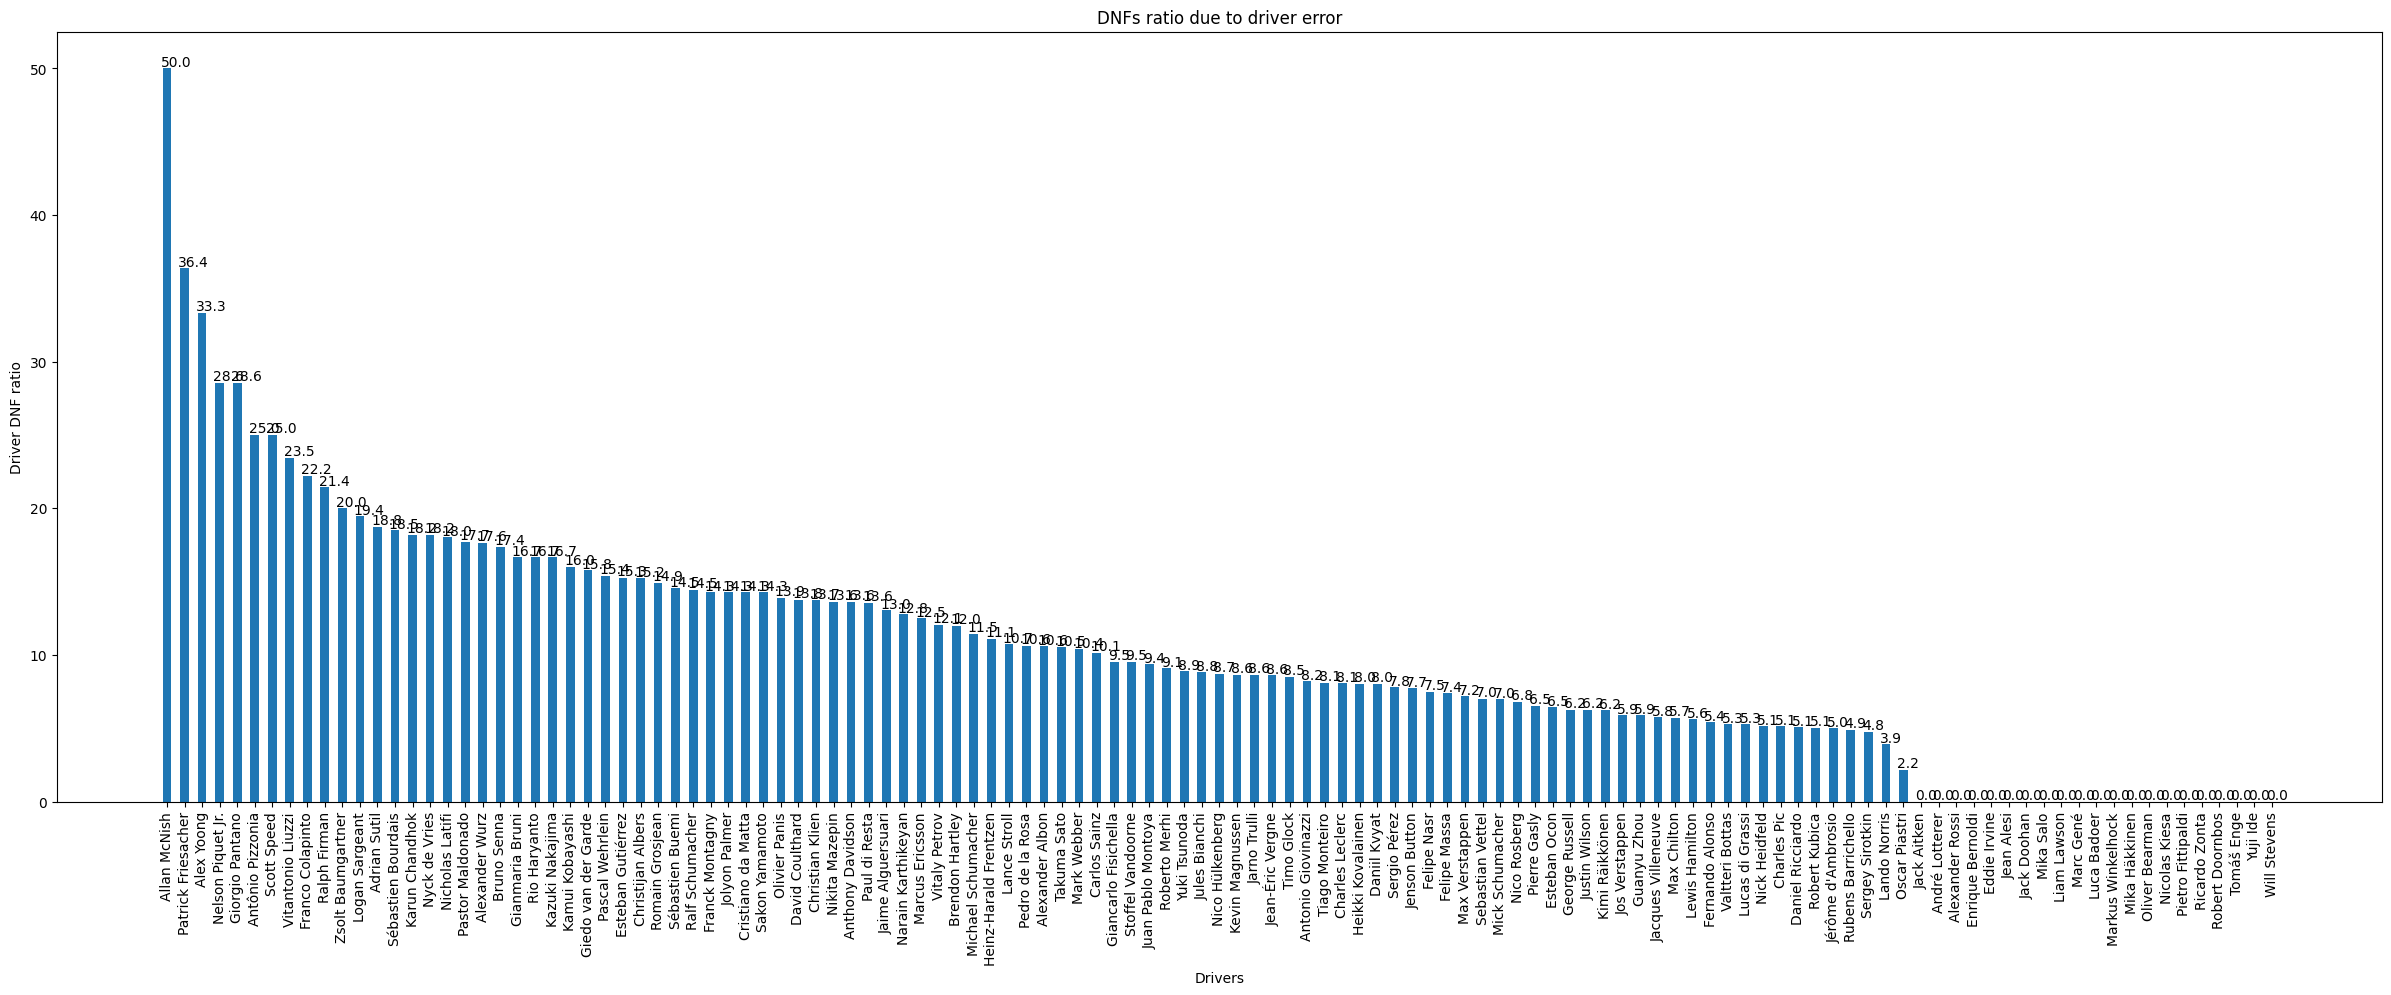

In [30]:
dnf_by_driver = data.groupby('driver')['driver_dnf'].sum()
driver_race_entered = data.groupby('driver')['driver_dnf'].count()
driver_dnf_ratio = (dnf_by_driver*100/driver_race_entered).sort_values(ascending=False)
plt.figure(figsize=(30,10))
bars = plt.bar(x=driver_dnf_ratio.index,height=driver_dnf_ratio,align='center',width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Drivers')
plt.ylabel('Driver DNF ratio')
plt.title('DNFs ratio due to driver error')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()-0.1,yval+0.15,f'{round(yval,1)}')
plt.show()

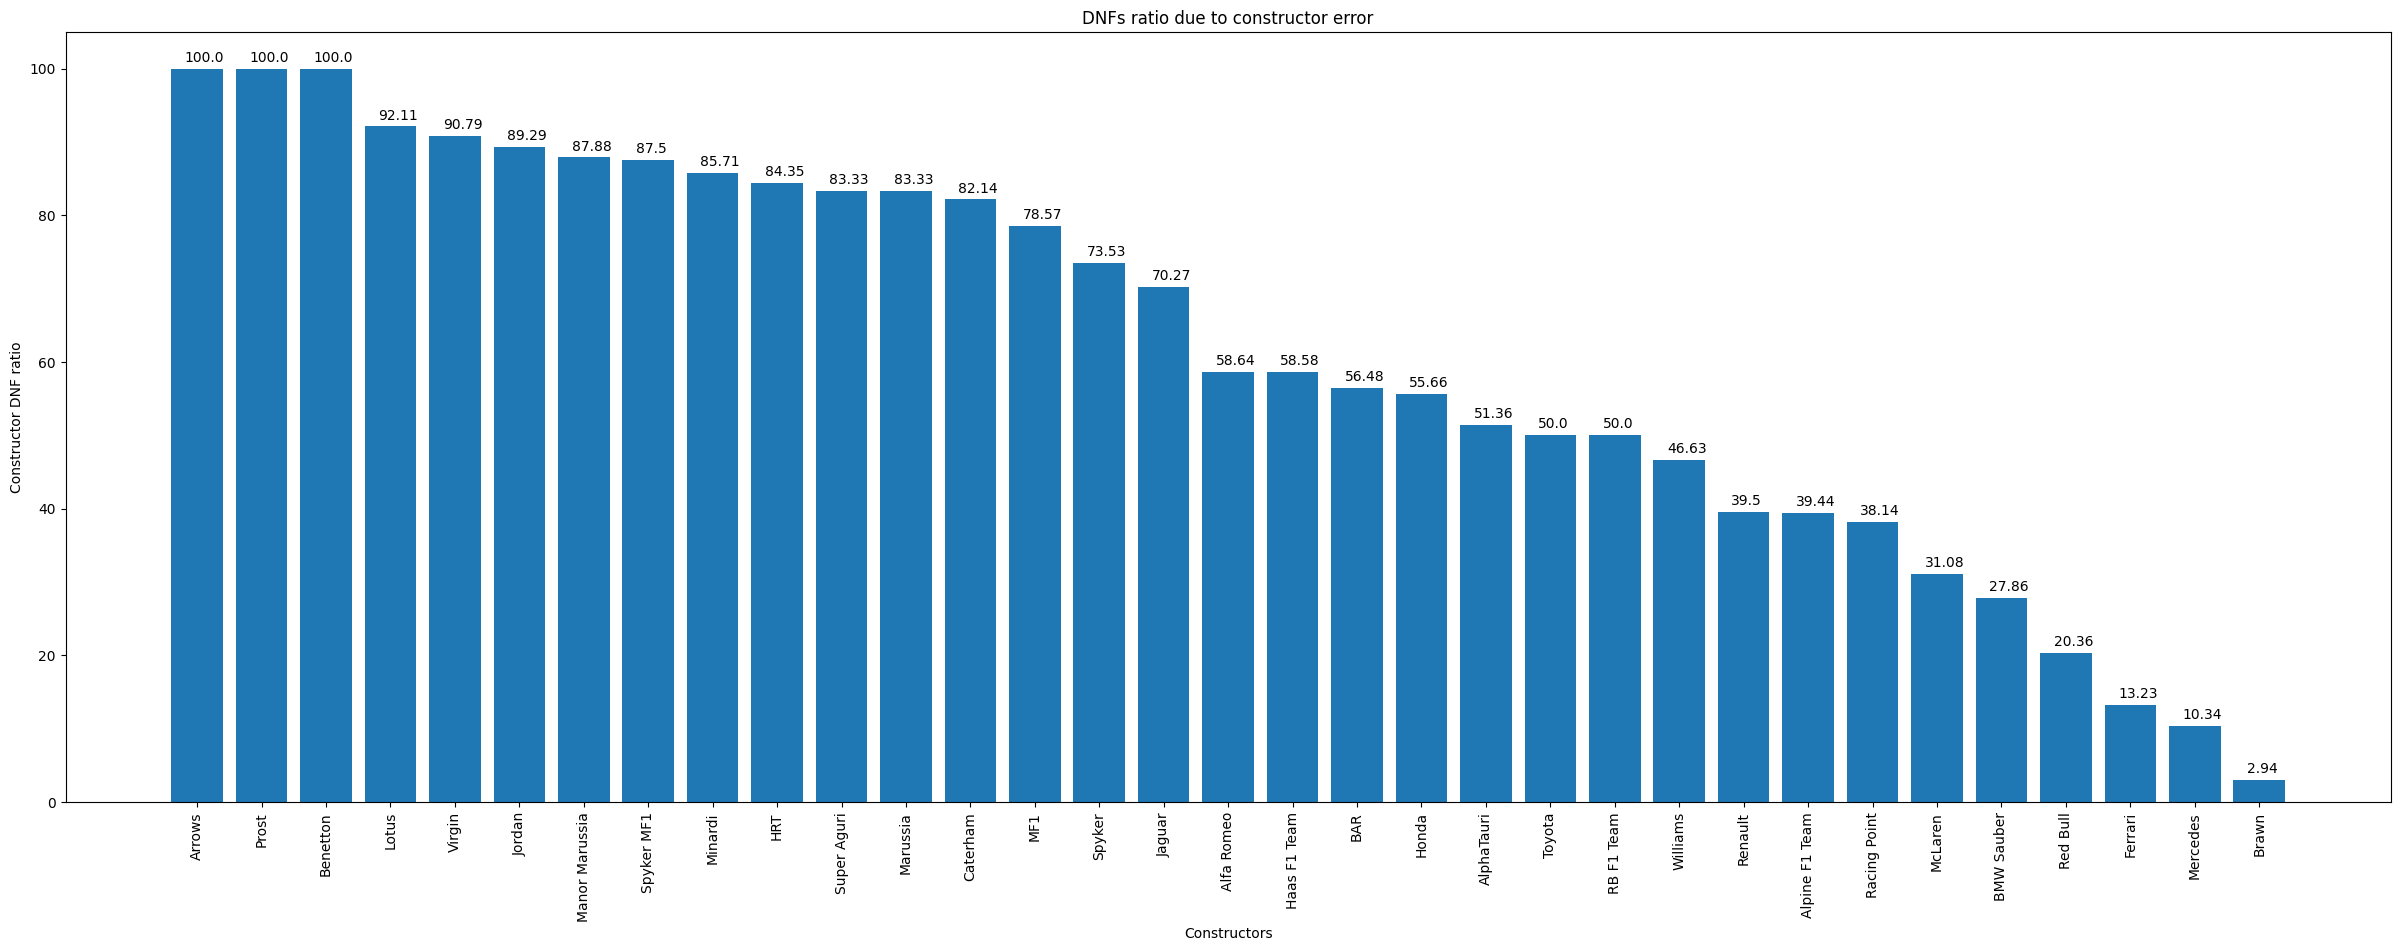

In [35]:
dnf_by_constructor = data.groupby('constructor')['constructor_dnf'].sum()
constructor_races = data.groupby('constructor')['constructor_dnf'].count()
dnf_ratio = (dnf_by_constructor * 100 / constructor_races).sort_values(ascending=False)
plt.figure(figsize=(30,10))
bars = plt.bar(x=dnf_ratio.index,height=dnf_ratio,align='center',width=0.8)
plt.xticks(rotation=90)
plt.xlabel('Constructors')
plt.ylabel('Constructor DNF ratio')
plt.title('DNFs ratio due to constructor error')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.21,yval+1,f'{round(yval,2)}')
plt.show()

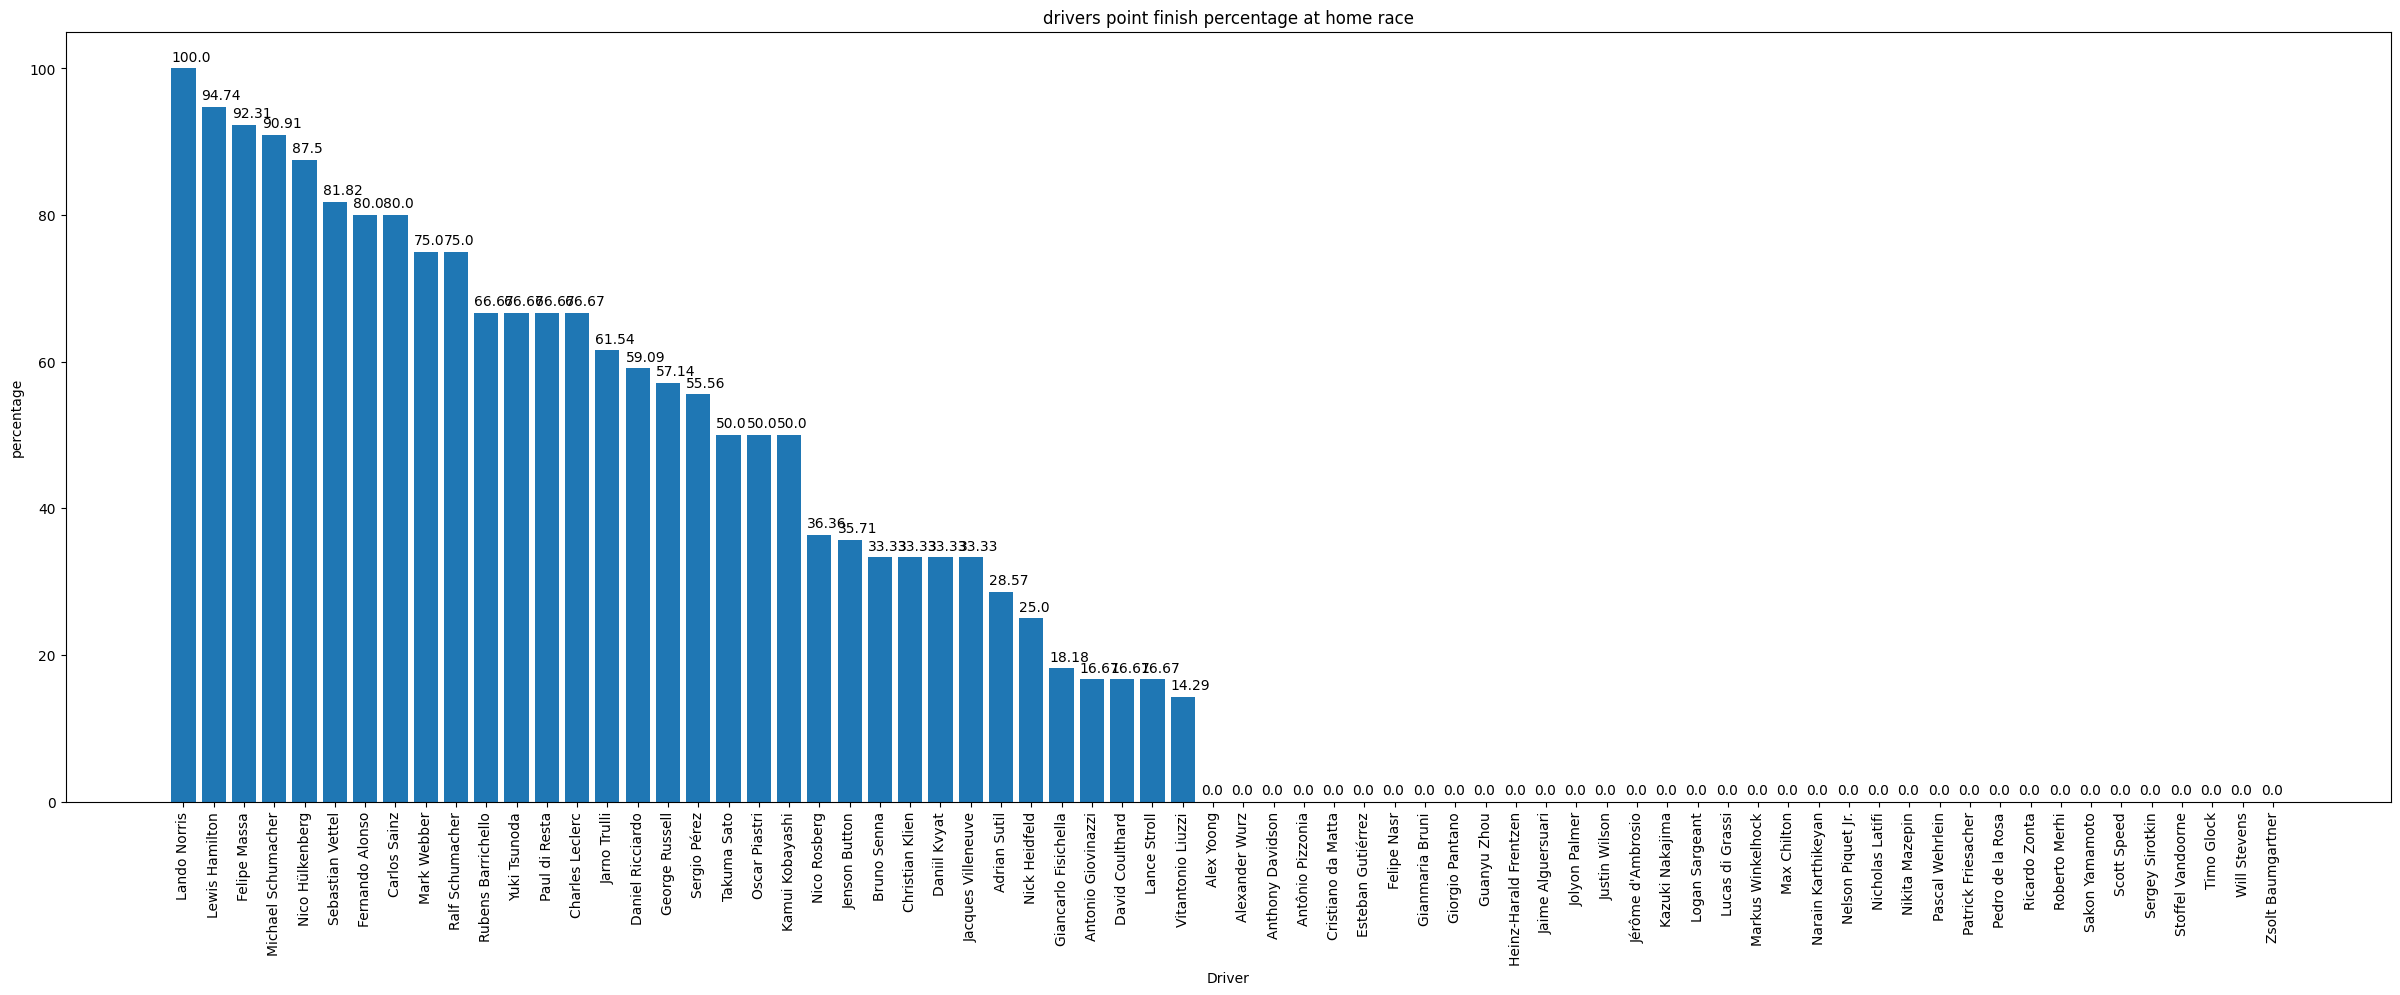

In [38]:
driver_home_points_finish = data.loc[(data['position']<11)&(data['driver_home']==1)].groupby('driver').count()['position']
total_home_races = data[data['driver_home']==1].groupby('driver')['driver_home'].count()
driver_home_point_finish_ratio = (driver_home_points_finish*100/total_home_races).sort_values(ascending=False).fillna(0)
plt.figure(figsize=(30,10))
bars = plt.bar(x=driver_home_point_finish_ratio.index,height=driver_home_point_finish_ratio,align='center',width=0.8)
plt.xticks(rotation=90)
plt.xlabel('Driver')
plt.ylabel('percentage')
plt.title('drivers point finish percentage at home race')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x(),yval+1,f'{round(yval,2)}')
plt.show()

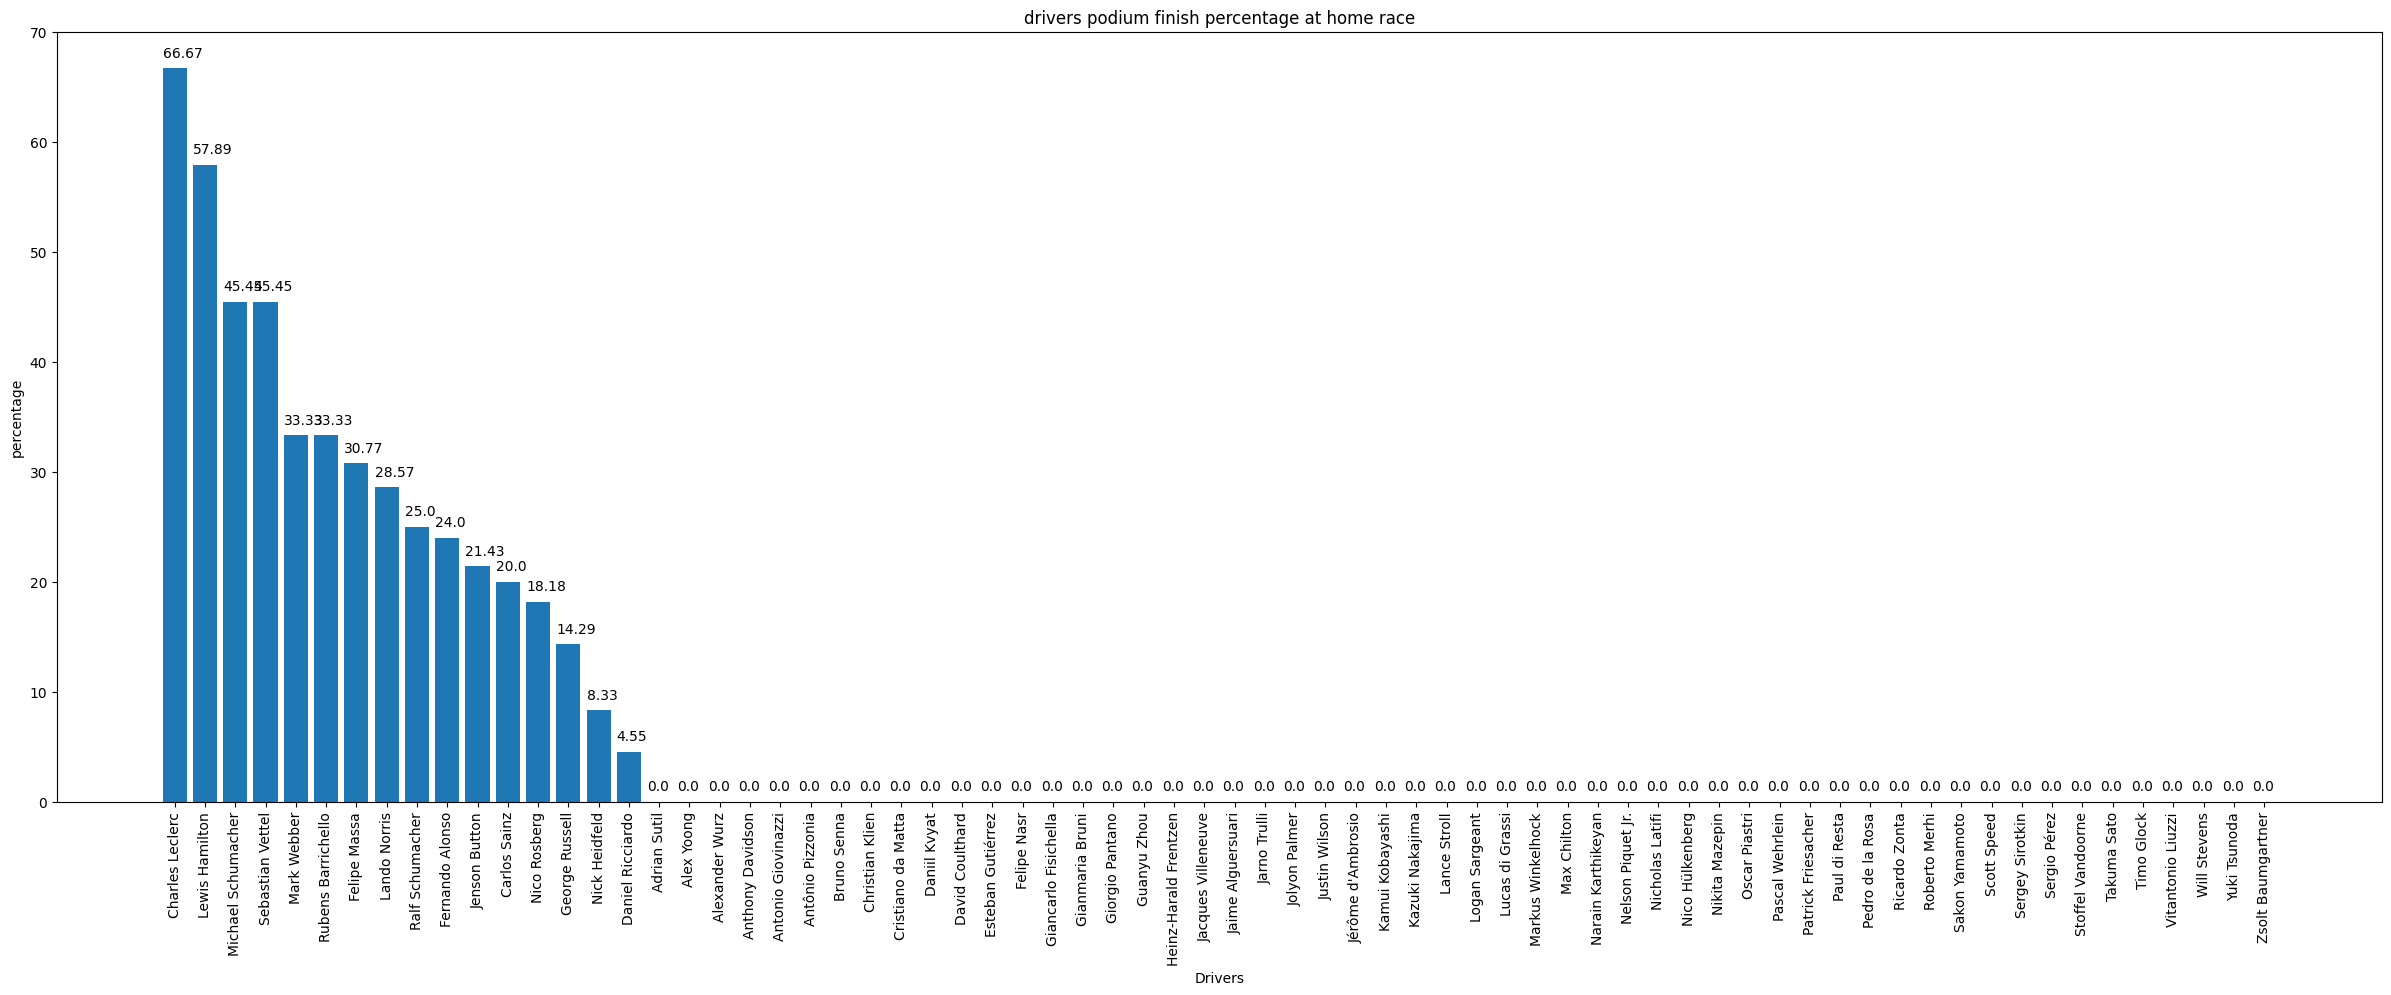

In [40]:
driver_home_podium_finish = data.loc[(data['position']<4)&(data['driver_home']==1)].groupby('driver').count()['position']
total_home_races = data[data['driver_home']==1].groupby('driver')['driver_home'].count()
driver_home_podium_finish_ratio = (driver_home_podium_finish*100/total_home_races).sort_values(ascending=False).fillna(0)
plt.figure(figsize=(30,10))
bars = plt.bar(x=driver_home_podium_finish_ratio.index,height=driver_home_podium_finish_ratio,align='center',width=0.8)
plt.xticks(rotation=90)
plt.xlabel('Drivers')
plt.ylabel('percentage')
plt.title('drivers podium finish percentage at home race')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x(),yval+1,f'{round(yval,2)}')
plt.show()

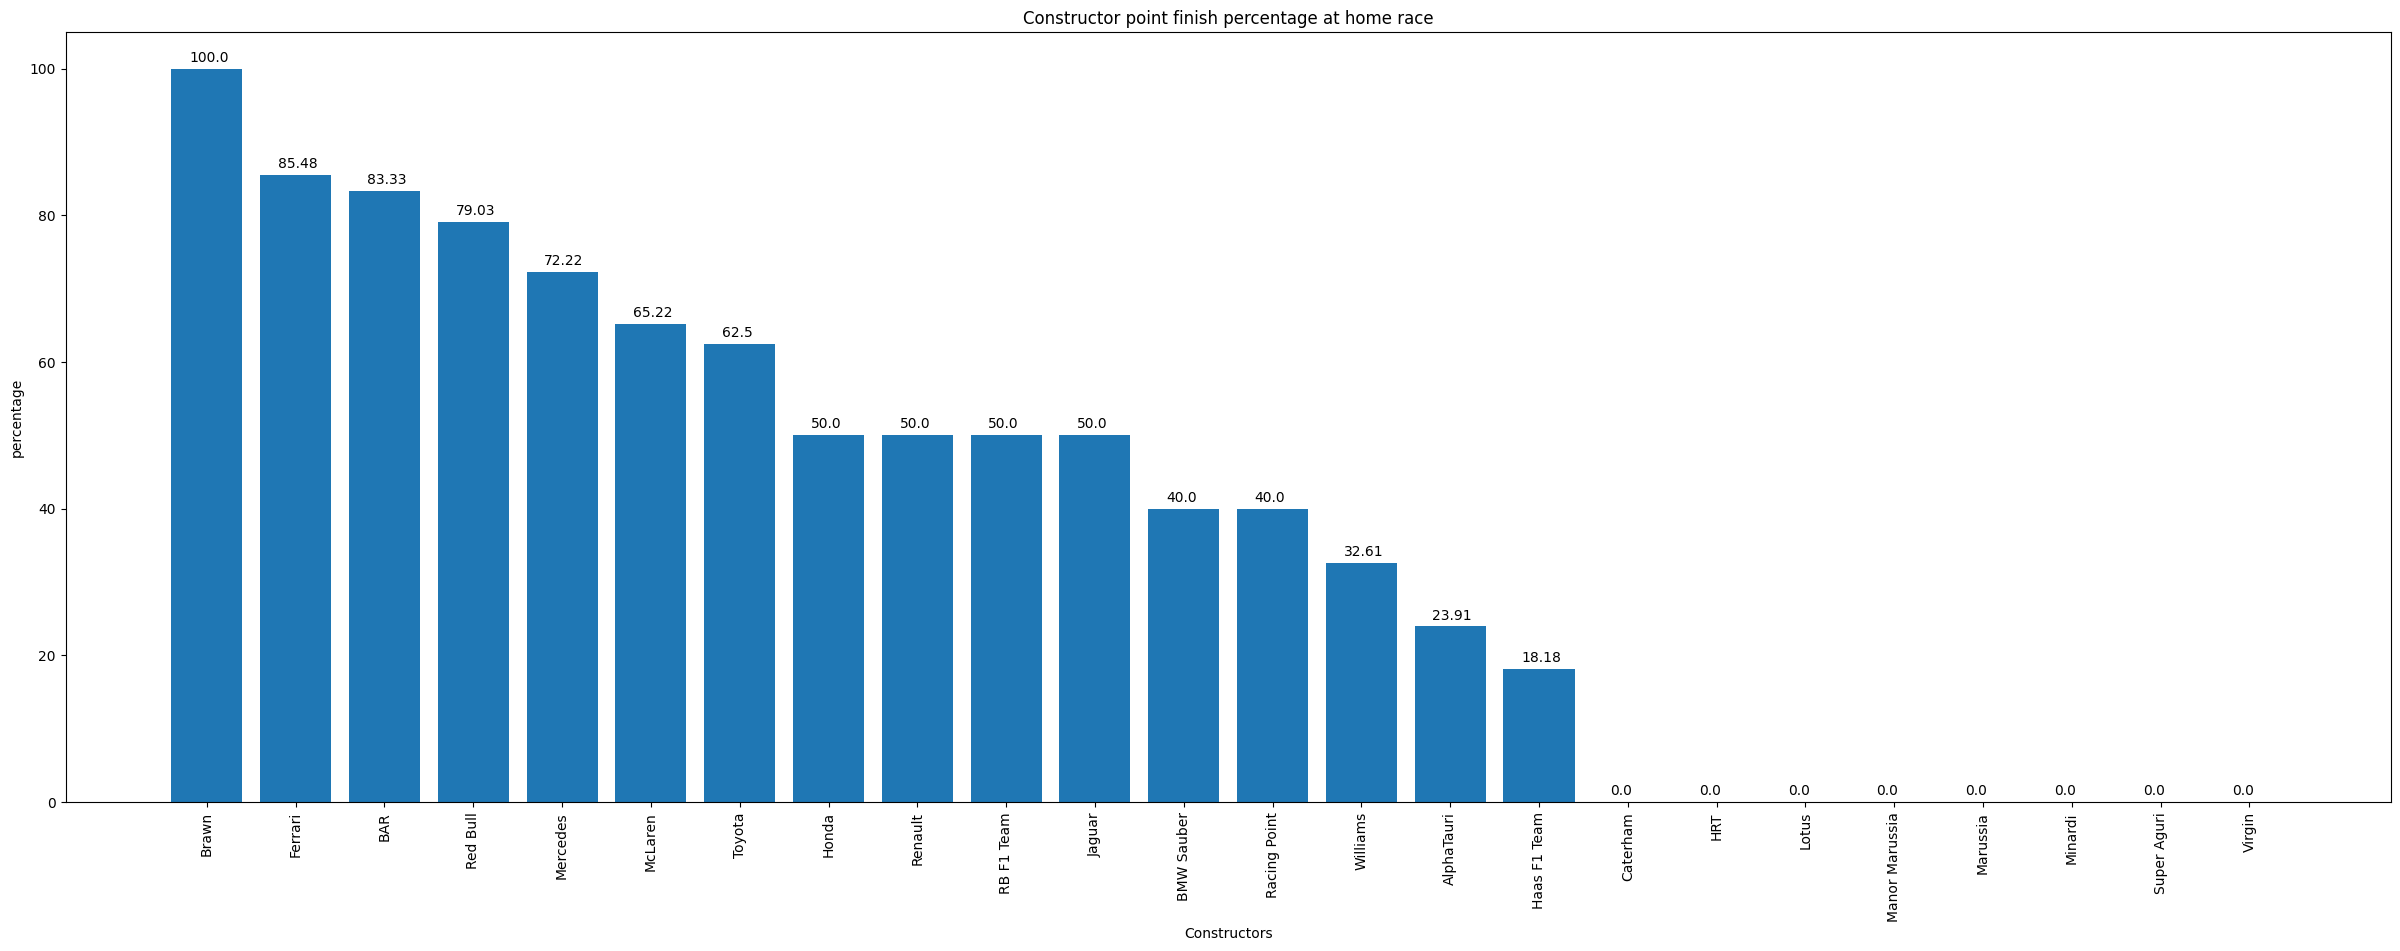

In [41]:
constructor_home_points_finish = data.loc[(data['position']<11)&(data['constructor_home']==1)].groupby('constructor').count()['position']
total_home_races = data[data['constructor_home']==1].groupby('constructor')['constructor_home'].count()
constructor_home_point_finish_ratio = (constructor_home_points_finish*100/total_home_races).sort_values(ascending=False).fillna(0)
plt.figure(figsize=(30,10))
bars = plt.bar(x=constructor_home_point_finish_ratio.index,height=constructor_home_point_finish_ratio,align='center',width=0.8)
plt.xticks(rotation=90)
plt.xlabel('Constructors')
plt.ylabel('percentage')
plt.title('Constructor point finish percentage at home race')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.2,yval+1,f'{round(yval,2)}')
plt.show()

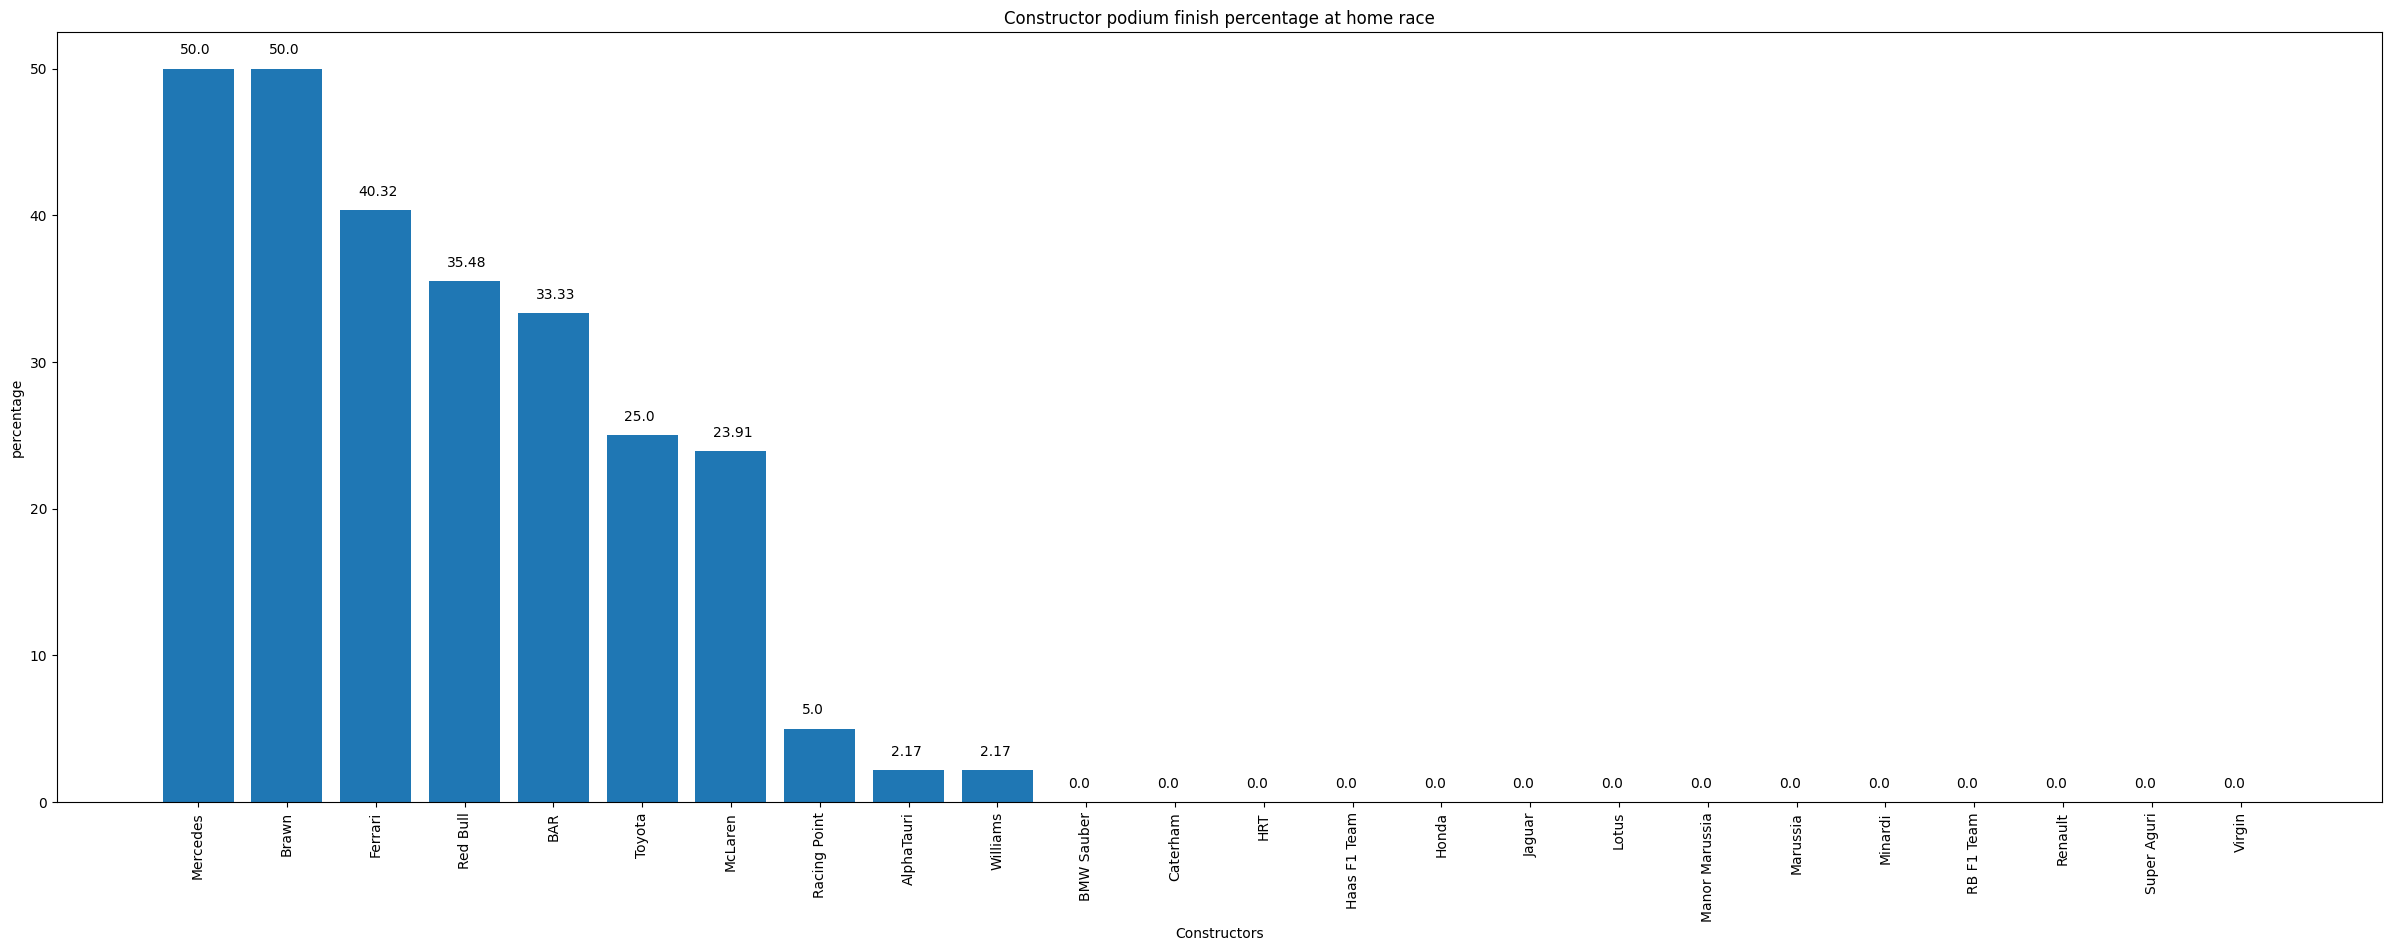

In [42]:
constructor_home_points_finish = data.loc[(data['position']<4)&(data['constructor_home']==1)].groupby('constructor').count()['position']
total_home_races = data[data['constructor_home']==1].groupby('constructor')['constructor_home'].count()
constructor_home_point_finish_ratio = (constructor_home_points_finish*100/total_home_races).sort_values(ascending=False).fillna(0)
plt.figure(figsize=(30,10))
bars = plt.bar(x=constructor_home_point_finish_ratio.index,height=constructor_home_point_finish_ratio,align='center',width=0.8)
plt.xticks(rotation=90)
plt.xlabel('Constructors')
plt.ylabel('percentage')
plt.title('Constructor podium finish percentage at home race')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.2,yval+1,f'{round(yval,2)}')
plt.show()

In [44]:
dnf_by_driver = data.groupby('driver')['driver_dnf'].sum()
driver_race_entered = data.groupby('driver')['driver_dnf'].count()
driver_dnf_ratio = (dnf_by_driver/driver_race_entered)
driver_confidence = 1-driver_dnf_ratio
driver_confidence_dict = dict(zip(driver_confidence.index,driver_confidence))

In [45]:
dnf_by_constructor = data.groupby('constructor')['constructor_dnf'].sum()
constructor_race_entered = data.groupby('constructor')['constructor_dnf'].count()
constructor_dnf_ratio = (dnf_by_constructor/constructor_race_entered)
constructor_relaiblity = 1-constructor_dnf_ratio
constructor_relaiblity_dict = dict(zip(constructor_relaiblity.index,constructor_relaiblity))

In [46]:
data['driver_confidence'] = data['driver'].apply(lambda x:driver_confidence_dict[x])
data['constructor_relaiblity'] = data['constructor'].apply(lambda x:constructor_relaiblity_dict[x])
#removing retired drivers and constructors
active_constructors = ['Renault', 'Williams', 'McLaren', 'Ferrari', 'Mercedes',
                       'AlphaTauri', 'Racing Point', 'Alfa Romeo', 'Red Bull',
                       'Haas F1 Team']
active_drivers = ['Daniel Ricciardo', 'Kevin Magnussen', 'Carlos Sainz',
                  'Valtteri Bottas', 'Lance Stroll', 'George Russell',
                  'Lando Norris', 'Sebastian Vettel', 'Kimi Räikkönen',
                  'Charles Leclerc', 'Lewis Hamilton', 'Daniil Kvyat',
                  'Max Verstappen', 'Pierre Gasly', 'Alexander Albon',
                  'Sergio Pérez', 'Esteban Ocon', 'Antonio Giovinazzi',
                  'Romain Grosjean','Nicholas Latifi']
data['active_driver'] = data['driver'].apply(lambda x: int(x in active_drivers))
data['active_constructor'] = data['constructor'].apply(lambda x: int(x in active_constructors))

In [47]:
data

,year,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,...,driver,age_at_gp_in_days,driver_home,constructor_home,driver_dnf,constructor_dnf,driver_confidence,constructor_relaiblity,active_driver,active_constructor
0,2009,2009-03-29,\N,\N,\N,\N,\N,\N,\N,\N,...,Jenson Button,10662,0,0,0,0,0.922780,0.970588,0,0
1,2009,2009-03-29,\N,\N,\N,\N,\N,\N,\N,\N,...,Rubens Barrichello,13459,0,0,0,0,0.950920,0.970588,0,0
2,2009,2009-03-29,\N,\N,\N,\N,\N,\N,\N,\N,...,Jarno Trulli,12678,0,0,0,0,0.913580,0.500000,0,0
3,2009,2009-03-29,\N,\N,\N,\N,\N,\N,\N,\N,...,Timo Glock,9873,0,0,0,0,0.914894,0.500000,0,0
4,2009,2009-03-29,\N,\N,\N,\N,\N,\N,\N,\N,...,Fernando Alonso,10105,0,0,0,0,0.945736,0.605030,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10479,2024,2024-12-08,2024-12-06,09:30:00,2024-12-06,13:00:00,2024-12-07,10:30:00,2024-12-07,14:00:00,...,Kevin Magnussen,11752,0,0,0,1,0.913514,0.414248,1,1
10480,2024,2024-12-08,2024-12-06,09:30:00,2024-12-06,13:00:00,2024-12-07,10:30:00,2024-12-07,14:00:00,...,Liam Lawson,8336,0,0,0,1,1.000000,0.500000,0,0
10481,2024,2024-12-08,2024-12-06,09:30:00,2024-12-06,13:00:00,2024-12-07,10:30:00,2024-12-07,14:00:00,...,Valtteri Bottas,12886,0,0,1,0,0.947368,0.413649,1,1
10482,2024,2024-12-08,2024-12-06,09:30:00,2024-12-06,13:00:00,2024-12-07,10:30:00,2024-12-07,14:00:00,...,Franco Colapinto,7866,0,0,0,1,0.777778,0.533721,0,1


**Model considering both drivers and constructors**

In [48]:
cleaned_data = data[['GP_name','quali_pos','constructor','driver','position','driver_confidence','constructor_relaiblity','active_driver','active_constructor','dob']]
cleaned_data = cleaned_data[(cleaned_data['active_driver']==1)&(cleaned_data['active_constructor']==1)]

In [49]:
cleaned_data

,GP_name,quali_pos,constructor,driver,position,driver_confidence,constructor_relaiblity,active_driver,active_constructor,dob
12,Albert Park Grand Prix Circuit,3,Red Bull,Sebastian Vettel,3,0.929766,0.796438,1,1,1987-07-03
14,Albert Park Grand Prix Circuit,7,Ferrari,Kimi Räikkönen,9,0.937695,0.867749,1,1,1979-10-17
19,Albert Park Grand Prix Circuit,18,McLaren,Lewis Hamilton,15,0.943820,0.689173,1,1,1985-01-07
26,Sepang International Circuit,12,McLaren,Lewis Hamilton,13,0.943820,0.689173,1,1,1985-01-07
33,Sepang International Circuit,7,Ferrari,Kimi Räikkönen,9,0.937695,0.867749,1,1,1979-10-17
...,...,...,...,...,...,...,...,...,...,...
10474,Yas Marina Circuit,18,Williams,Alexander Albon,16,0.894231,0.533721,1,1,1996-03-23
10477,Yas Marina Circuit,13,Racing Point,Lance Stroll,13,0.892857,0.618557,1,1,1998-10-29
10479,Yas Marina Circuit,14,Haas F1 Team,Kevin Magnussen,15,0.913514,0.414248,1,1,1992-10-05
10481,Yas Marina Circuit,9,Alfa Romeo,Valtteri Bottas,9,0.947368,0.413649,1,1,1989-08-28


In [50]:
x = cleaned_data

In [52]:
def position_index(x):
    if x<4:
        return 1
    if x>10:
        return 3
    else :
        return 2

In [53]:
data.columns

Index(['year', 'date', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
       'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date',
       'sprint_time', 'quali_pos', 'statusId', 'position', 'dob',
       'driver_nationality', 'constructor', 'constructor_nationality',
       'GP_name', 'country', 'driver', 'age_at_gp_in_days', 'driver_home',
       'constructor_home', 'driver_dnf', 'constructor_dnf',
       'driver_confidence', 'constructor_relaiblity', 'active_driver',
       'active_constructor'],
      dtype='object')

In [54]:
#Some of the constructors changed their name over the year so replacing old names with current name
data['constructor'] = data['constructor'].apply(lambda x: 'Racing Point' if x=='Force India' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Racing Point' if x=='Aston Martin' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Alfa Romeo' if x=='Sauber' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Renault' if x=='Lotus F1' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Renault' if x=='Alpine' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'AlphaTauri' if x=='Toro Rosso' else x)

In [55]:
constructor_names = ['Ferrari', 'Red Bull', 'Mercedes', 'Racing Point', 'Williams', 'Alfa Romeo', 'AlphaTauri', 'McLaren', 'Renault', 'Haas F1 Team']

for name in constructor_names:
    reliability = cleaned_data.loc[cleaned_data['constructor'] == name, 'constructor_relaiblity'].values[0]
    print(f"{name}: {reliability}")

Ferrari: 0.8677494199535962
Red Bull: 0.7964376590330788
Mercedes: 0.896551724137931
Racing Point: 0.6185567010309279
Williams: 0.5337209302325581
Alfa Romeo: 0.41364902506963785
AlphaTauri: 0.4864091559370529
McLaren: 0.6891734575087312
Renault: 0.6050295857988166
Haas F1 Team: 0.4142480211081794


In [57]:
drivers = [
    'Lewis Hamilton',
    'George Russell',
    'Max Verstappen',
    'Sergio Pérez',
    'Charles Leclerc',
    'Carlos Sainz',
    'Lando Norris',
    'Oscar Piastri',
    'Esteban Ocon',
    'Pierre Gasly',
    'Yuki Tsunoda',
    'Daniel Ricciardo',
    'Fernando Alonso',
    'Lance Stroll',
    'Valtteri Bottas',
    'Zhou Guanyu',
    'Alex Albon',
    'Kevin Magnussen',
    'Nico Hulkenberg',
    'Oliver Bearman'
]

In [58]:
driver_confidence_dict = {}

for driver in drivers:
    driver_data = cleaned_data[cleaned_data['driver'] == driver]
    if len(driver_data) > 0:
        driver_confidence_dict[driver] = driver_data.iloc[0]['driver_confidence']
    else:
        driver_confidence_dict[driver] = 0.8

for driver, confidence in driver_confidence_dict.items():
    print(f"{driver}: {confidence}")

Lewis Hamilton: 0.9438202247191011
George Russell: 0.9375
Max Verstappen: 0.9282296650717703
Sergio Pérez: 0.9219858156028369
Charles Leclerc: 0.9194630872483222
Carlos Sainz: 0.8985507246376812
Lando Norris: 0.9609375
Oscar Piastri: 0.8
Esteban Ocon: 0.935483870967742
Pierre Gasly: 0.934640522875817
Yuki Tsunoda: 0.8
Daniel Ricciardo: 0.94921875
Fernando Alonso: 0.8
Lance Stroll: 0.8928571428571429
Valtteri Bottas: 0.9473684210526316
Zhou Guanyu: 0.8
Alex Albon: 0.8
Kevin Magnussen: 0.9135135135135135
Nico Hulkenberg: 0.8
Oliver Bearman: 0.8


In [59]:
cleaned_data

,GP_name,quali_pos,constructor,driver,position,driver_confidence,constructor_relaiblity,active_driver,active_constructor,dob
12,Albert Park Grand Prix Circuit,3,Red Bull,Sebastian Vettel,3,0.929766,0.796438,1,1,1987-07-03
14,Albert Park Grand Prix Circuit,7,Ferrari,Kimi Räikkönen,9,0.937695,0.867749,1,1,1979-10-17
19,Albert Park Grand Prix Circuit,18,McLaren,Lewis Hamilton,15,0.943820,0.689173,1,1,1985-01-07
26,Sepang International Circuit,12,McLaren,Lewis Hamilton,13,0.943820,0.689173,1,1,1985-01-07
33,Sepang International Circuit,7,Ferrari,Kimi Räikkönen,9,0.937695,0.867749,1,1,1979-10-17
...,...,...,...,...,...,...,...,...,...,...
10474,Yas Marina Circuit,18,Williams,Alexander Albon,16,0.894231,0.533721,1,1,1996-03-23
10477,Yas Marina Circuit,13,Racing Point,Lance Stroll,13,0.892857,0.618557,1,1,1998-10-29
10479,Yas Marina Circuit,14,Haas F1 Team,Kevin Magnussen,15,0.913514,0.414248,1,1,1992-10-05
10481,Yas Marina Circuit,9,Alfa Romeo,Valtteri Bottas,9,0.947368,0.413649,1,1,1989-08-28


In [60]:
import pandas as pd
constructors = ["Ferrari", "Red Bull", "Mercedes", "Racing Point", "Williams", "Alfa Romeo", "AlphaTauri", "McLaren",
                "Renault", "Haas F1 Team"]
driverconfidences = {
    "Lewis Hamilton": 0.9438202247191011,
    "George Russell": 0.9375,
    "Max Verstappen": 0.9282296650717703,
    "Sergio Pérez": 0.9219858156028369,
    "Charles Leclerc": 0.9194630872483222,
    "Carlos Sainz": 0.8985507246376812,
    "Lando Norris": 0.9609375,
    "Oscar Piastri": 0.8,
    "Esteban Ocon": 0.935483870967742,
    "Pierre Gasly": 0.934640522875817,
    "Yuki Tsunoda": 0.8,
    "Daniel Ricciardo": 0.94921875,
    "Fernando Alonso": 0.8,
    "Lance Stroll": 0.8928571428571429,
    "Valtteri Bottas": 0.9473684210526316,
    "Zhou Guanyu": 0.8,
    "Alex Albon": 0.8,
    "Kevin Magnussen": 0.9135135135135135,
    "Nico Hulkenberg": 0.8,
    "Oliver Bearman": 0.8
}
driver_confidences = [
    0.9438202247191011,  # Lewis Hamilton
    0.9375,             # George Russell
    0.9282296650717703, # Max Verstappen
    0.9219858156028369, # Sergio Pérez
    0.9194630872483222, # Charles Leclerc
    0.8985507246376812, # Carlos Sainz
    0.9609375,         # Lando Norris
    0.8,               # Oscar Piastri
    0.935483870967742,  # Esteban Ocon
    0.934640522875817,  # Pierre Gasly
    0.8,               # Yuki Tsunoda
    0.94921875,       # Daniel Ricciardo
    0.8,               # Fernando Alonso
    0.8928571428571429, # Lance Stroll
    0.9473684210526316, # Valtteri Bottas
    0.8,               # Zhou Guanyu
    0.8,               # Alex Albon
    0.9135135135135135, # Kevin Magnussen
    0.8,               # Nico Hulkenberg
    0.8                 # Oliver Bearman
]
drivers = [
    "Charles Leclerc",
    "Max Verstappen",
    "Sergio Pérez",
    "Carlos Sainz",
    "Lewis Hamilton",
    "Fernando Alonso",
    "Lando Norris",
    "Yuki Tsunoda",
    "Lance Stroll",
    "Oscar Piastri",
    "George Russell",
    "Esteban Ocon",
    "Alex Albon",
    "Valtteri Bottas",
    "Logan Sargeant",
    "Zhou Guanyu",
    "Nico Hulkenberg",
    "Kevin Magnussen",
    "Pierre Gasly",
    "Oliver Bearman"
]
import random
constructor_reliabilities = [0.8243589743589743, 0.7508650519031141, 0.7508650519031141, 0.8243589743589743,
0.8778054862842892, 0.5902335456475584, 0.6344916344916345, 0.4553903345724907,
0.5902335456475584, 0.6344916344916345, 0.8778054862842892, 0.6018518518518519,
0.5699614890885751, 0.3952755905511811, 0.5699614890885751, 0.3952755905511811,
0.34302325581395354, 0.34302325581395354, 0.6018518518518519, 0.4553903345724907]
# Create dictionary of data
newdata = {
    'GP_name': ['Baku City Circuit','Baku City Circuit','Baku City Circuit','Baku City Circuit','Baku City Circuit','Baku City Circuit','Baku City Circuit','Baku City Circuit','Baku City Circuit','Baku City Circuit','Baku City Circuit','Baku City Circuit','Baku City Circuit','Baku City Circuit','Baku City Circuit','Baku City Circuit','Baku City Circuit','Baku City Circuit','Baku City Circuit','Baku City Circuit'],
    'quali_pos': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'constructor': ["Ferrari", "Red Bull","Red Bull","Ferrari","Mercedes","Racing Point","McLaren","AlphaTauri","Racing Point","McLaren", "Mercedes","Renault","Williams", "Alfa Romeo","Williams","Alfa Romeo","Haas F1 Team","Haas F1 Team","Renault","AlphaTauri"],
    'driver': drivers,
    'driver_confidence': driver_confidences,
    'constructor_relaiblity':constructor_reliabilities,
    'active_driver': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'active_constructor': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'dob': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
}

# Create dataframe

new_data = pd.DataFrame(newdata)
new_data['istest'] = 1

# Print dataframe
print(new_data)

              GP_name  quali_pos   constructor           driver  \
0   Baku City Circuit          1       Ferrari  Charles Leclerc   
1   Baku City Circuit          2      Red Bull   Max Verstappen   
2   Baku City Circuit          3      Red Bull     Sergio Pérez   
3   Baku City Circuit          4       Ferrari     Carlos Sainz   
4   Baku City Circuit          5      Mercedes   Lewis Hamilton   
5   Baku City Circuit          6  Racing Point  Fernando Alonso   
6   Baku City Circuit          7       McLaren     Lando Norris   
7   Baku City Circuit          8    AlphaTauri     Yuki Tsunoda   
8   Baku City Circuit          9  Racing Point     Lance Stroll   
9   Baku City Circuit         10       McLaren    Oscar Piastri   
10  Baku City Circuit         11      Mercedes   George Russell   
11  Baku City Circuit         12       Renault     Esteban Ocon   
12  Baku City Circuit         13      Williams       Alex Albon   
13  Baku City Circuit         14    Alfa Romeo  Valtteri Botta

In [61]:
cleaned_data = pd.concat([cleaned_data,new_data])

In [62]:
cleaned_data

,GP_name,quali_pos,constructor,driver,position,driver_confidence,constructor_relaiblity,active_driver,active_constructor,dob,istest
12,Albert Park Grand Prix Circuit,3,Red Bull,Sebastian Vettel,3.0,0.929766,0.796438,1,1,1987-07-03 00:00:00,NaN
14,Albert Park Grand Prix Circuit,7,Ferrari,Kimi Räikkönen,9.0,0.937695,0.867749,1,1,1979-10-17 00:00:00,NaN
19,Albert Park Grand Prix Circuit,18,McLaren,Lewis Hamilton,15.0,0.943820,0.689173,1,1,1985-01-07 00:00:00,NaN
26,Sepang International Circuit,12,McLaren,Lewis Hamilton,13.0,0.943820,0.689173,1,1,1985-01-07 00:00:00,NaN
33,Sepang International Circuit,7,Ferrari,Kimi Räikkönen,9.0,0.937695,0.867749,1,1,1979-10-17 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15,Baku City Circuit,16,Alfa Romeo,Zhou Guanyu,NaN,0.800000,0.395276,1,1,1,1.0
16,Baku City Circuit,17,Haas F1 Team,Nico Hulkenberg,NaN,0.800000,0.343023,1,1,1,1.0
17,Baku City Circuit,18,Haas F1 Team,Kevin Magnussen,NaN,0.913514,0.343023,1,1,1,1.0
18,Baku City Circuit,19,Renault,Pierre Gasly,NaN,0.800000,0.601852,1,1,1,1.0


In [83]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

sc  = StandardScaler()
le = LabelEncoder()

x = cleaned_data
x['GP_name'] = le.fit_transform(x['GP_name'])
x['constructor'] = le.fit_transform(x['constructor'])
x['driver'] = le.fit_transform(x['driver'])
x['GP_name'] = le.fit_transform(x['GP_name'])
X = x.drop(['position','active_driver','active_constructor'],axis=1)
X_test_new = X[X['istest'] == 1]
X = X[X['istest']== 0]
y = x[x['istest'] == 0]['position'].apply(lambda x: position_index(x))

In [75]:
y = x[x['istest'] == 0]['position']

In [76]:
y

Series([], Name: position, dtype: float64)

In [74]:
X

,GP_name,quali_pos,constructor,driver,driver_confidence,constructor_relaiblity,istest


In [68]:
X.dtypes

GP_name                     int64
quali_pos                   int64
constructor                 int64
driver                      int64
driver_confidence         float64
constructor_relaiblity    float64
dob                        object
istest                    float64
dtype: object

In [69]:
X = X.drop('dob', axis=1)
X_test_new =  X_test_new.drop('dob', axis=1)

In [71]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score

In [84]:
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results = []
results = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1, shuffle = True)
    result = cross_val_score(model,X,y,cv=cv,scoring='accuracy')
    mean_results.append(result.mean())
    results.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.